<a href="https://colab.research.google.com/github/vigneshsharma1997/YesBank_Stock_Prediction/blob/main/Yes_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project 1  
#**Yes Bank Stock Closing Price Prediction (Supervised - Regression)**
###Project by **Vignesh Sharma**
###Data Science Trainee at AlmaBetter
##Problem Statement-
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.



In [1]:
!pwd

/content


In [2]:
!sudo apt-get update
!sudo apt-get install texlive-xetex

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [965 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,064 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,085 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubun

In [3]:
!! jupyter nbconvert --to pdf Yes_Bank.ipynb

["[NbConvertApp] WARNING | pattern 'Yes_Bank.ipynb' matched no files",
 'This application is used to convert notebook files (*.ipynb)',
 '        to various other formats.',
 '',
 '        WARNING: THE COMMANDLINE INTERFACE MAY CHANGE IN FUTURE RELEASES.',
 '',
 'Options',
 '=======',
 'The options below are convenience aliases to configurable class-options,',
 'as listed in the "Equivalent to" description-line of the aliases.',
 'To see all configurable class-options for some <cmd>, use:',
 '    <cmd> --help-all',
 '',
 '--debug',
 '    set log level to logging.DEBUG (maximize logging output)',
 '    Equivalent to: [--Application.log_level=10]',
 '--show-config',
 "    Show the application's configuration (human-readable format)",
 '    Equivalent to: [--Application.show_config=True]',
 '--show-config-json',
 "    Show the application's configuration (json format)",
 '    Equivalent to: [--Application.show_config_json=True]',
 '--generate-config',
 '    generate default config file',


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
url = '/content/drive/MyDrive/Datasets/data_YesBank_StockPrices (1).csv'

In [8]:
data = pd.read_csv(url)

#Data Exploration

In [9]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
data.shape

(185, 5)

In [11]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
numerical_col = data.describe().columns

Data Distribution and mean and median of each single Indpendent variable.

In [14]:
from numpy import math

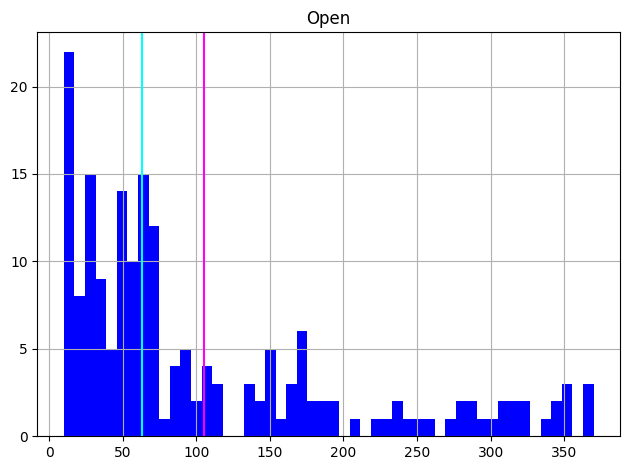

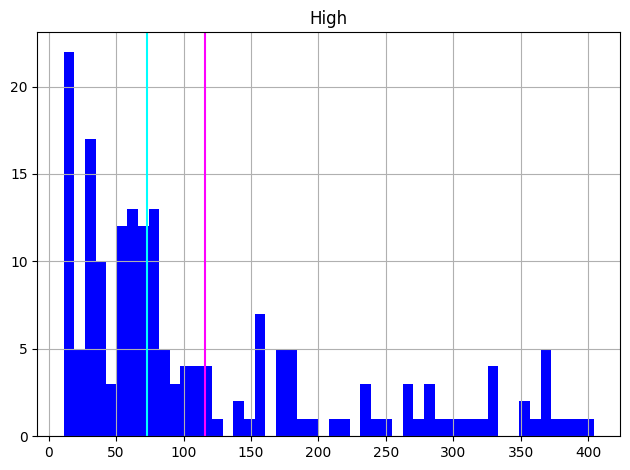

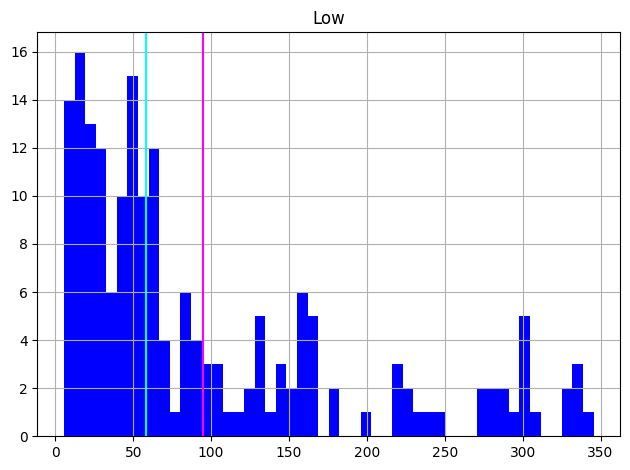

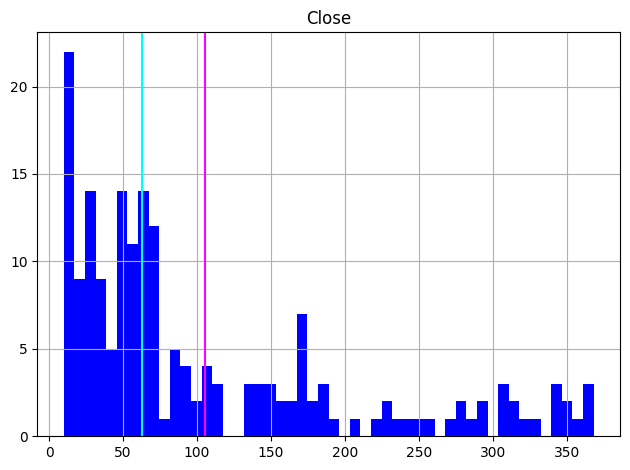

In [15]:
for i in numerical_col:
    fig, ax = plt.subplots()
    features = data[i]
    features.hist(bins=50, color='blue')
    ax.axvline(features.mean(), color='magenta')
    ax.axvline(features.median(), color='cyan')
    ax.set_title(i)
    fig.tight_layout()
    plt.show()

With the help of describe we can conclude that data is not normally distributed as mean is higher than median in all features.

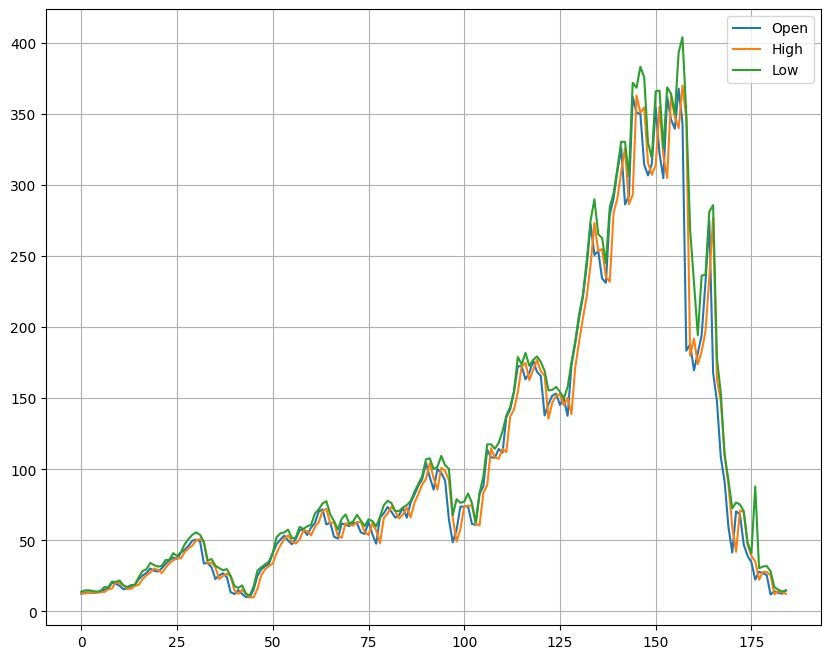

In [16]:
# Line plot
plt.figure(figsize=(10,8))
plt.plot(data['Close'])
plt.plot(data['Open'])
plt.plot(data['High'])
plt.legend(numerical_col)
plt.grid()



#Checking NaN values

In [17]:
#Checking Null Values
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [18]:
#Checking for Duplicate Values
len(data[data.duplicated()])

0

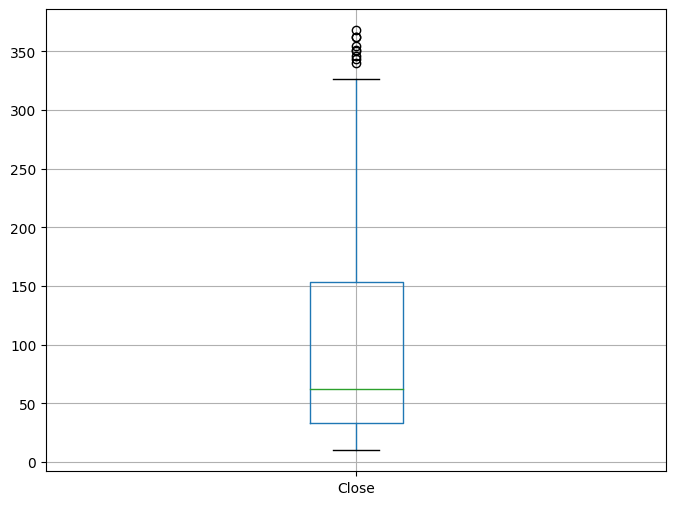

In [19]:
plt.figure(figsize=(8,6))
data.boxplot('Close')
plt.show()

#Exploratory Data Analysis

### Dependant Variable

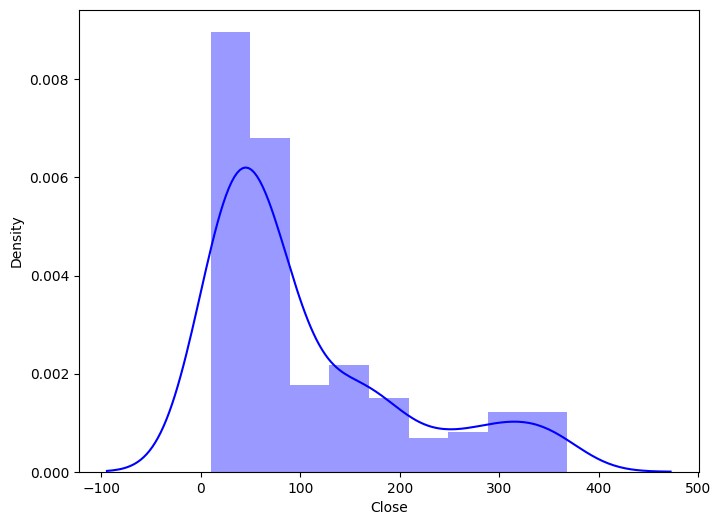

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(data['Close'],color='blue')
plt.show()

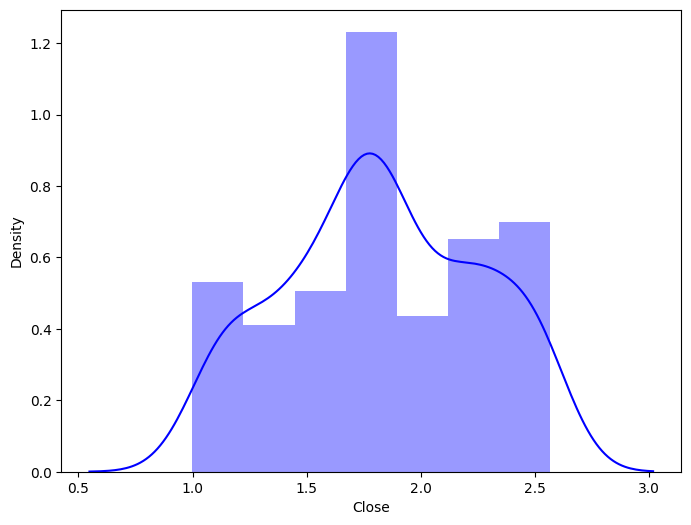

In [21]:
# For normal Distribution
plt.figure(figsize=(8,6))
sns.distplot(np.log10(data['Close']),color='blue')
plt.show()

### Independant Variable

In [22]:
numerical_col.shape

(4,)

<Axes: xlabel='Low', ylabel='Density'>

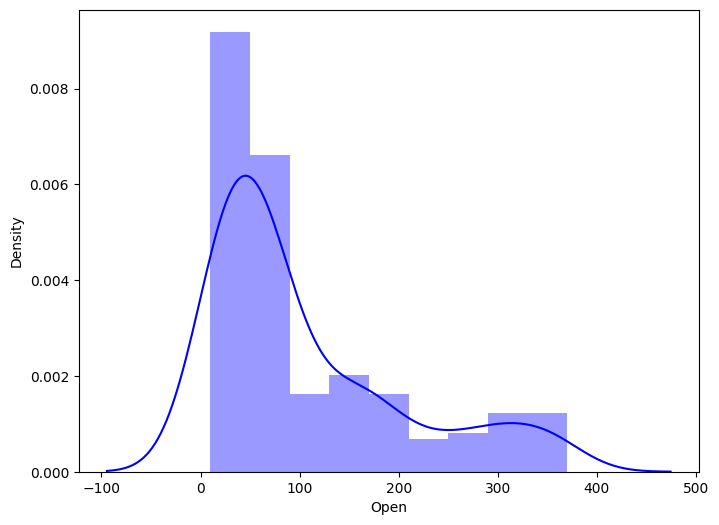

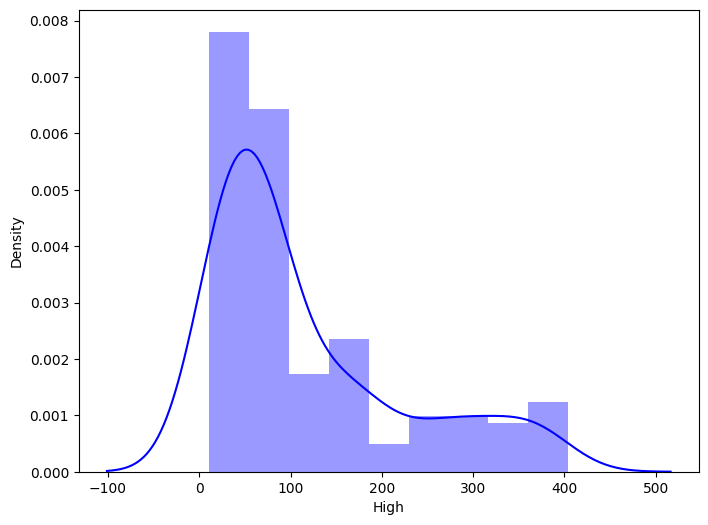

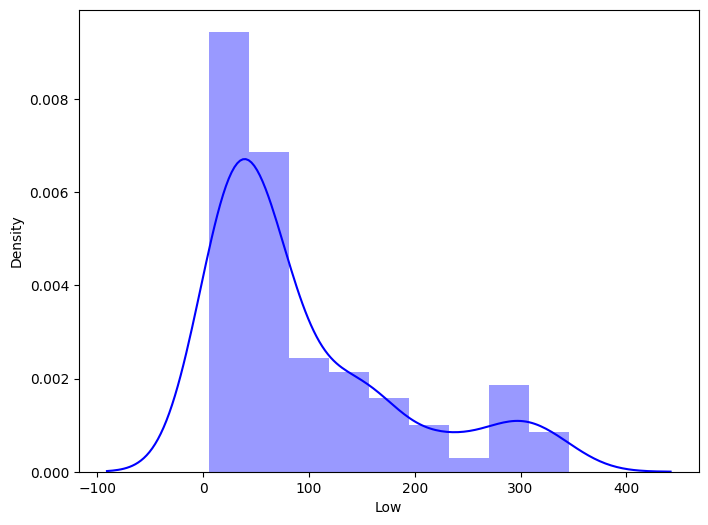

In [23]:
#Independent variables
plt.figure(figsize=(8,6))
sns.distplot(data['Open'], color='blue')

plt.figure(figsize=(8,6))
sns.distplot(data['High'], color='blue')

plt.figure(figsize=(8,6))
sns.distplot(data['Low'], color='blue')

<Axes: xlabel='Low', ylabel='Density'>

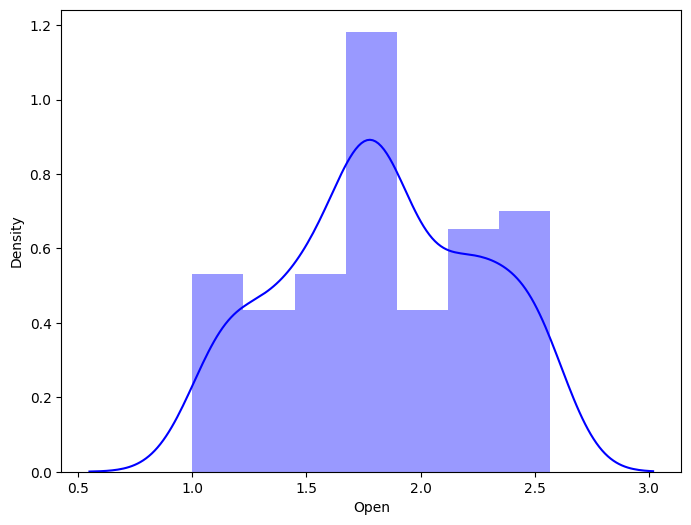

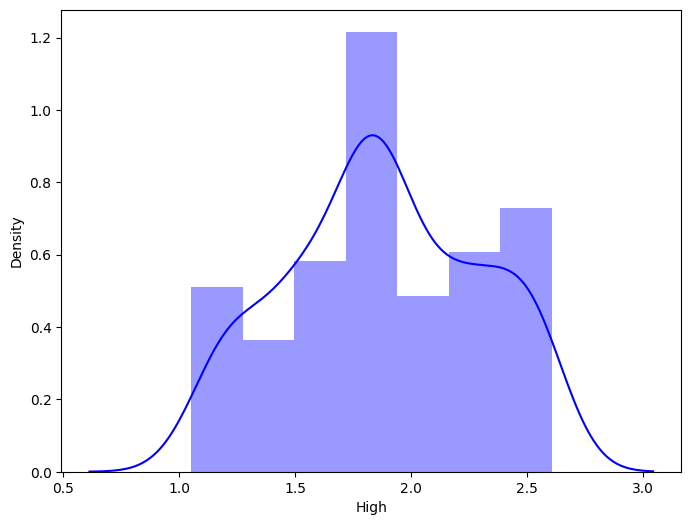

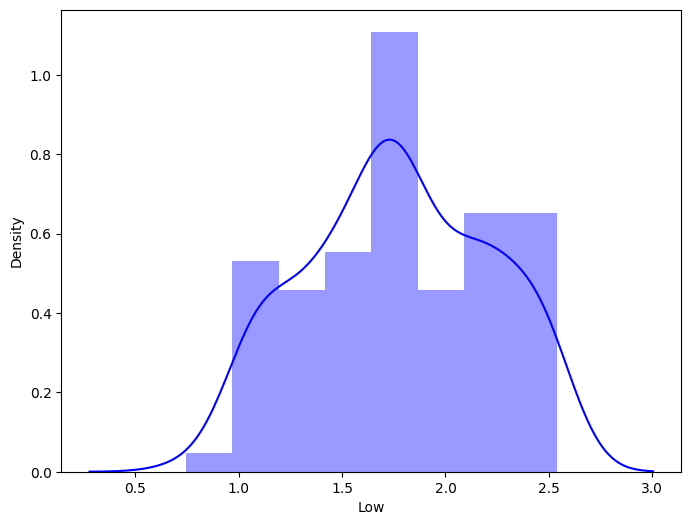

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(np.log10(data['Open']), color='blue')

plt.figure(figsize=(8,6))
sns.distplot(np.log10(data['High']), color='blue')

plt.figure(figsize=(8,6))
sns.distplot(np.log10(data['Low']), color='blue')

<Axes: >

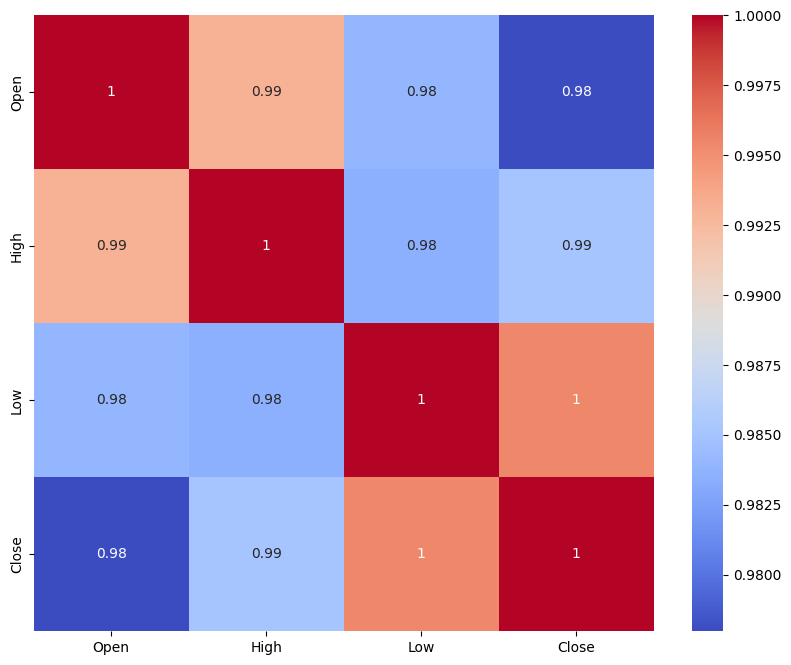

In [25]:
# Correlation between the Variables
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(abs(corr),annot=True,cmap='coolwarm')

### Finding Correlation Between Variables

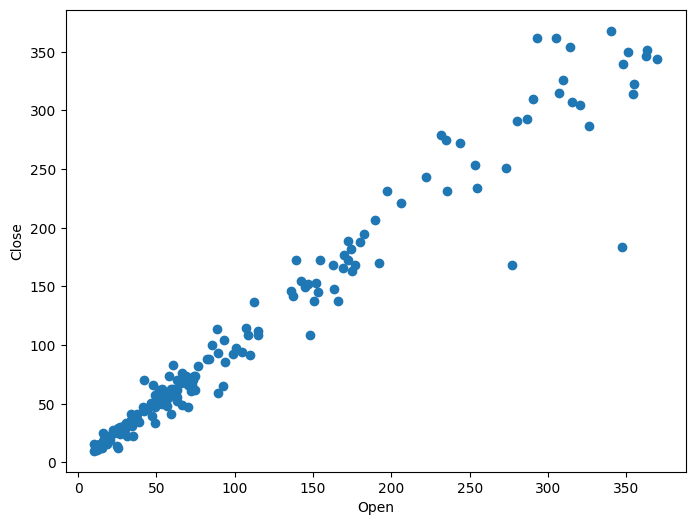

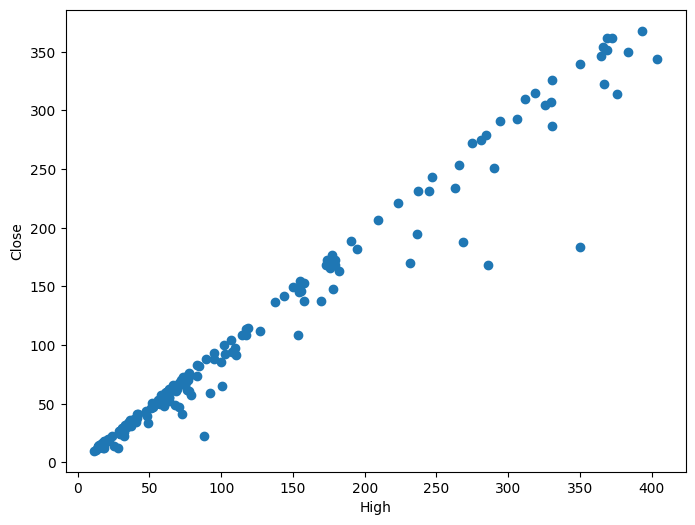

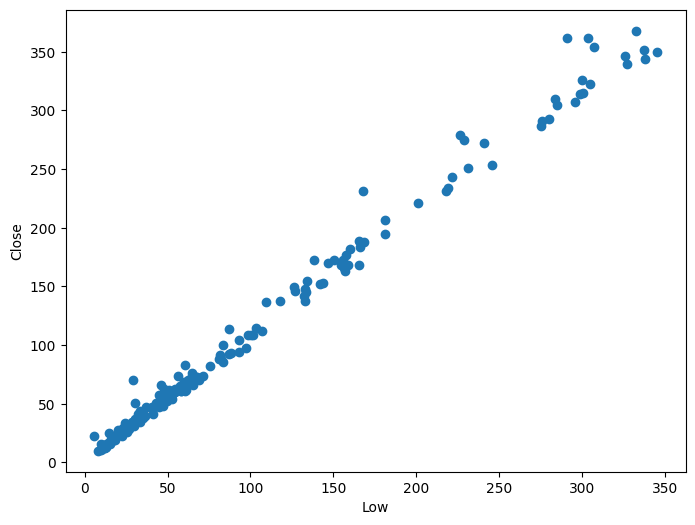

In [26]:
for col in numerical_col[:3]:
  fig = plt.figure(figsize=(8,6))
  ax=fig.gca()
  features = data[col]
  label = data['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')


###MultiCollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)


In [28]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [29]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

###Train Test Split

In [30]:
# Splitting our datas into dependant and independant variable
x = data.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(data['Close'])

In [31]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [32]:
def plot_model(model,x_train,y_train,x_test,y_test,plot_anomalies=False):
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  plt.figure(figsize=(8,6))
  plt.scatter(y_train,y_pred_train,label='training_data',alpha=0.6)
  plt.scatter(y_test,y_pred_test,label='test_data',alpha=0.6)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.legend(['Actual','Predicted'])
  plt.grid()
  plt.show()

  if plot_anomalies:
    anomalies_train = np.abs(y_train-y_pred_train)> 3*np.std(y_train)
    anomalies_test = np.abs(y_test-y_pred_test) > 3*np.std(y_test)

    plt.figure(figsize=(8,6))
    plt.plot(np.array(y_train),label='Actual',color='blue')
    plt.plot(y_pred_train,label='Predicted',color='green')
    plt.scatter(np.where(anomalies_train)[0],y_train[anomalies_train],color='red',label='anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Anomalies in Training Data')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    plt.plot(np.array(y_test), label='Actual', color='blue')
    plt.plot(y_pred_test, label='Predicted', color='green')
    plt.scatter(np.where(anomalies_test)[0], y_test[anomalies_test], color='red', label='Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Anomalies in Test Data')
    plt.legend()
    plt.show()



#Linear Regression Model

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [34]:
reg = LinearRegression()
model_1 = reg.fit(x_train,y_train)

In [35]:
reg.score(x_train,y_train)

0.8146653424416905

In [36]:
y_test_pred = reg.predict(x_test)
y_train_pred = reg.predict(x_train)

In [37]:
reg.intercept_

1.8292785179315048

In [38]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

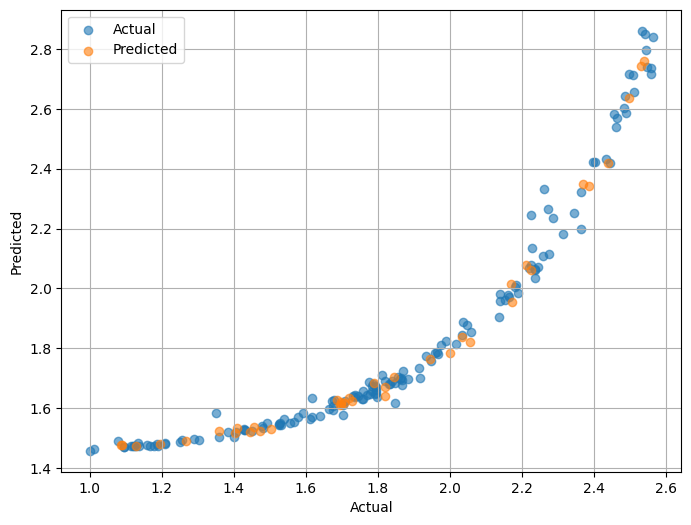

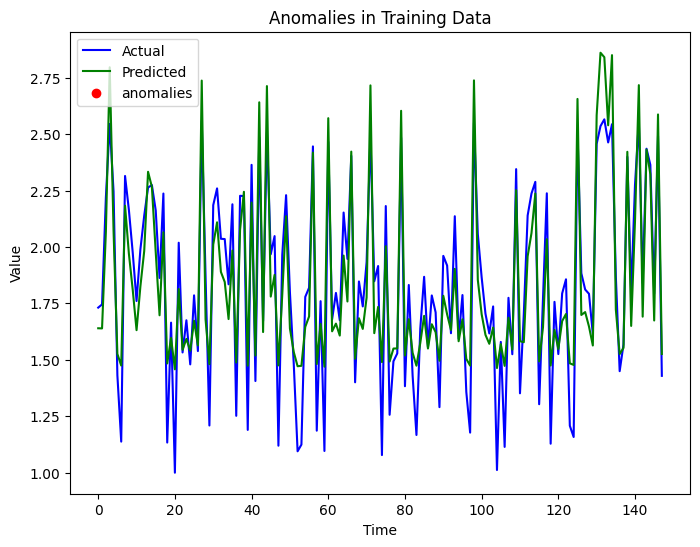

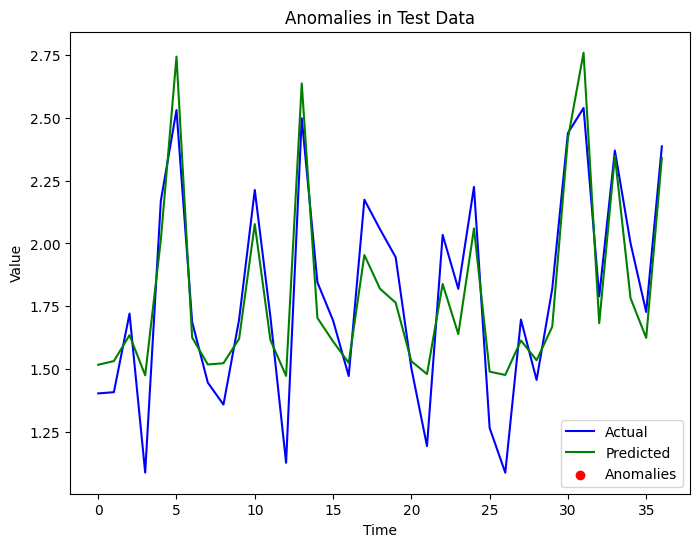

In [39]:
plot_model(reg,x_train,y_train,x_test,y_test,plot_anomalies=True)

### Evaluation Metrics

In [40]:
# Test Performance
print('MSE : ',mean_squared_error(y_test,y_test_pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_test_pred)))
print('MAE : ',mean_absolute_error(y_test,y_test_pred))
print('R2 : ',r2_score(y_test,y_test_pred))

MSE :  0.03158251893048738
RMSE :  0.17771471219481907
MAE :  0.15128511034606282
R2 :  0.8225699915389754


In [41]:
# Train Performance
print('MSE : ',mean_squared_error(y_train,y_train_pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_train,y_train_pred)))
print('MAE : ',mean_absolute_error(y_train,y_train_pred))
print('R2 : ',r2_score(y_train,y_train_pred))

MSE :  0.033659395765946676
RMSE :  0.18346497149577812
MAE :  0.1559169766820056
R2 :  0.8146653424416905


###Linear Regression Prediction Vs Actual

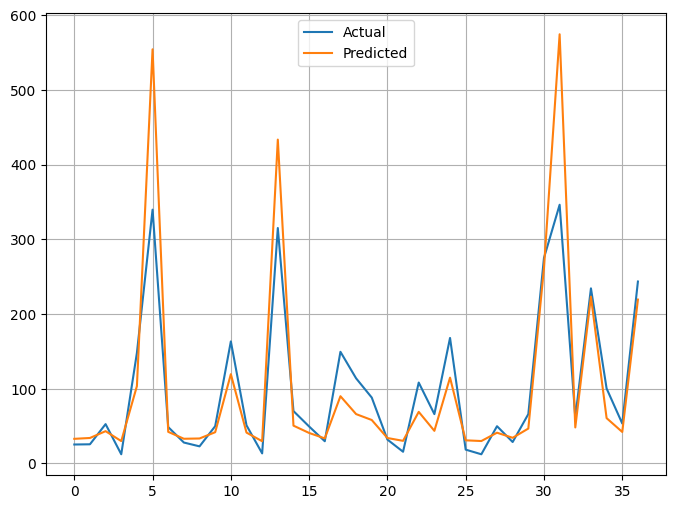

In [42]:
plt.figure(figsize=(8,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(x_train,y_train)

In [44]:
lasso.score(x_train,y_train)

0.8143673030311667

In [45]:
y_lasso_pred = lasso.predict(x_test)

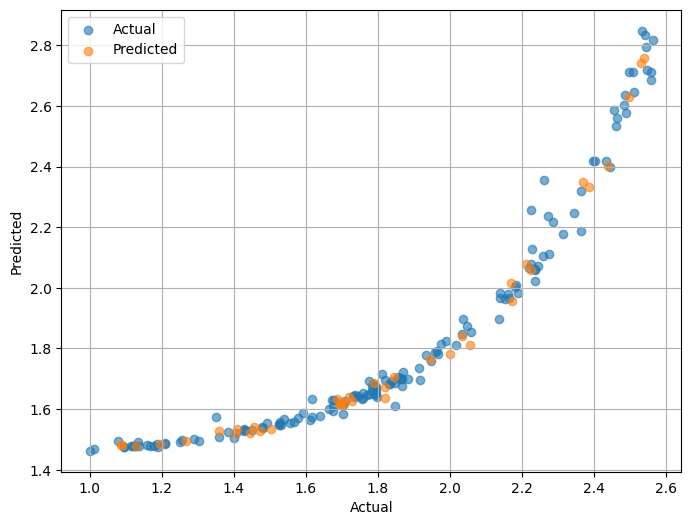

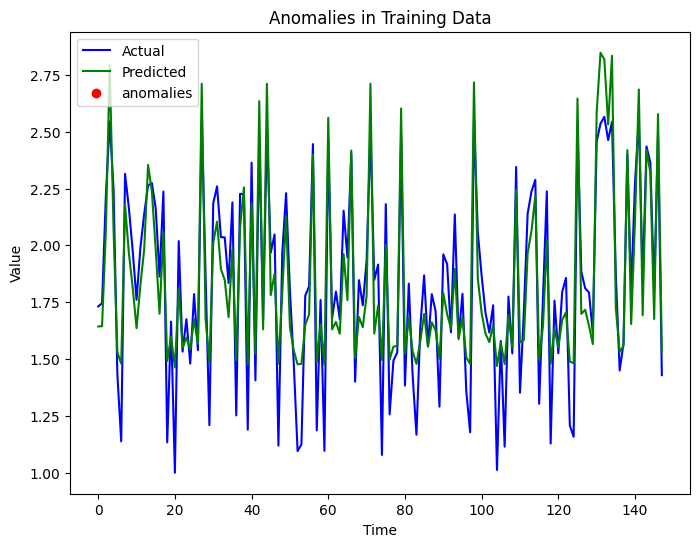

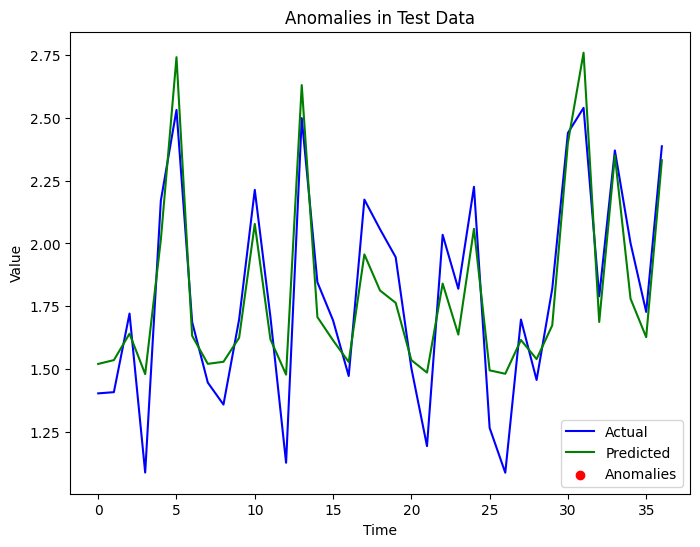

In [46]:
plot_model(lasso,x_train,y_train,x_test,y_test,plot_anomalies=True)

Evaluation Metrics

In [47]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


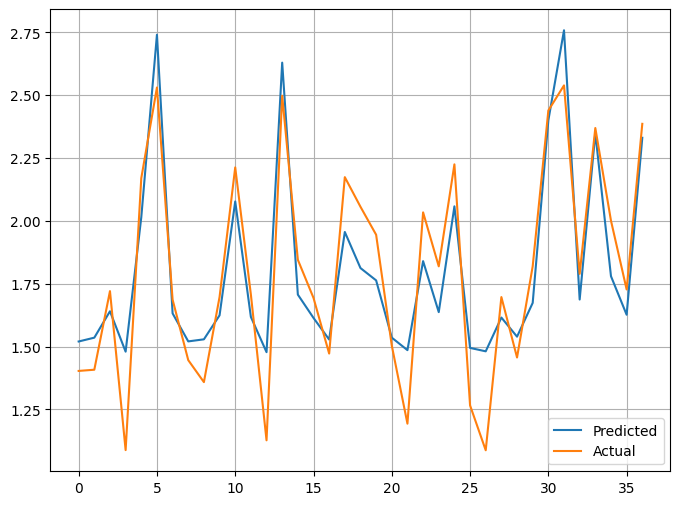

In [48]:
plt.figure(figsize=(8,6))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.grid()
plt.show()


### **Cross Validation**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Hyper Parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014],}
model_2 = GridSearchCV(lasso_cv,parameters,scoring='neg_mean_squared_error')

In [51]:
model_2.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [52]:
print("The best fit alpha value is found out to be :" ,model_2.best_params_)
print("\nUsing ",model_2.best_params_, " the negative mean squared error is: ", model_2.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03671253815080321


In [53]:
y_pred_lasso = model_2.predict(x_test)

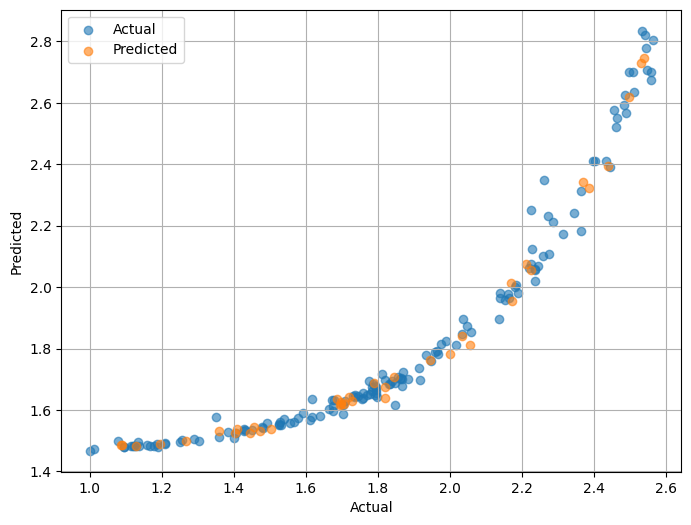

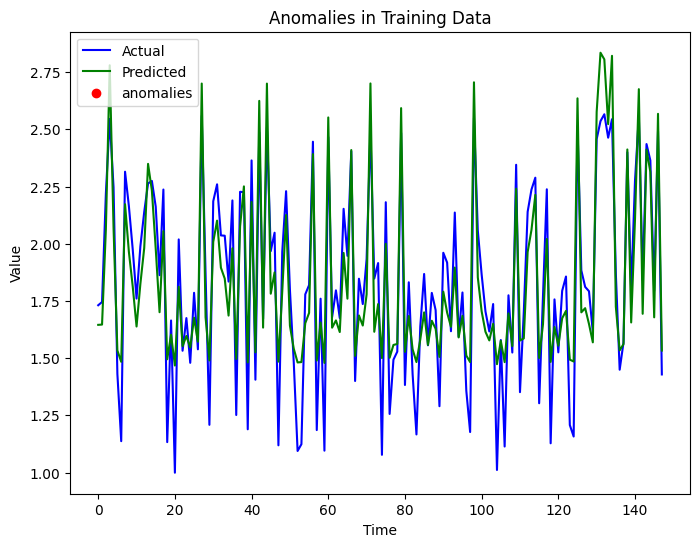

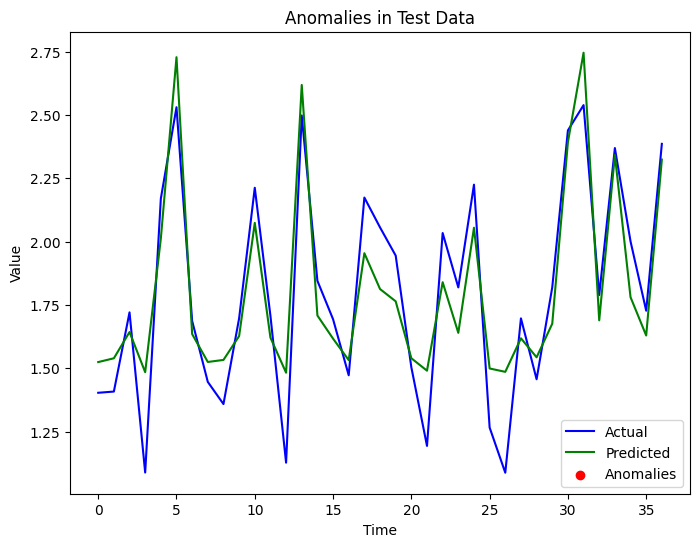

In [54]:
plot_model(model_2,x_train,y_train,x_test,y_test,plot_anomalies=True)

Evaluation Metrics

In [55]:
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


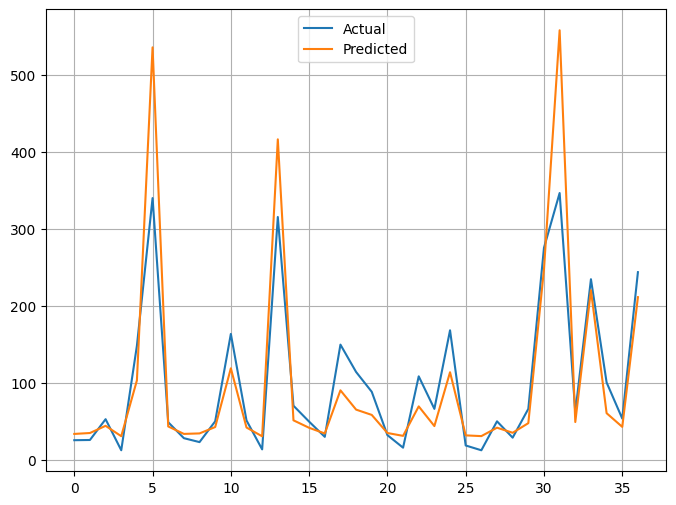

In [56]:
# Lasso plotting
plt.figure(figsize=(8,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [58]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [59]:
ridge.score(x_train,y_train)

0.81465524840887

In [60]:
y_ridge_pred = ridge.predict(x_test)

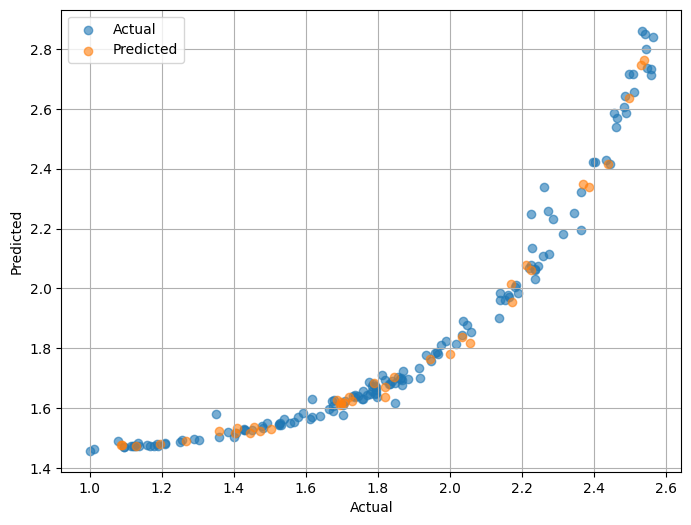

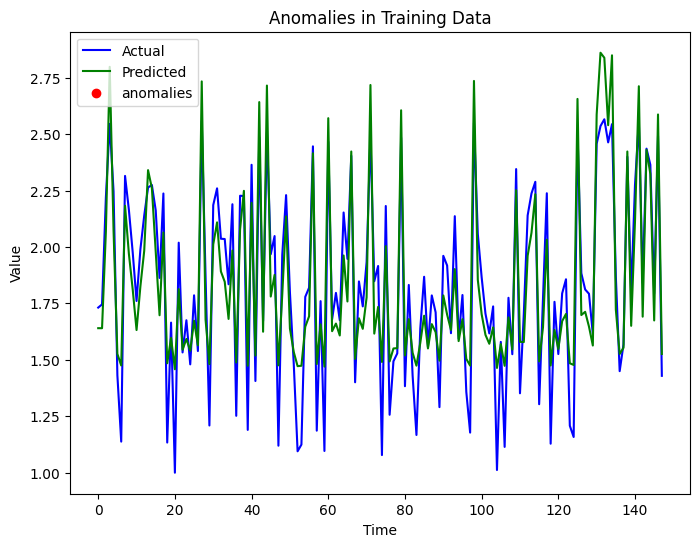

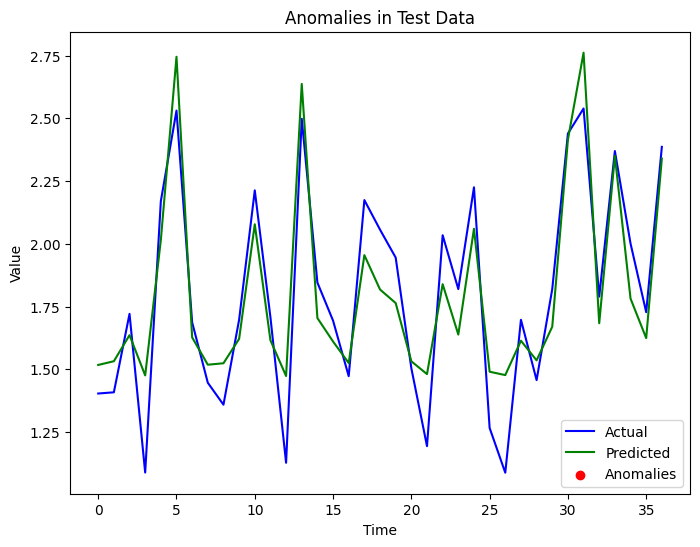

In [61]:
plot_model(ridge,x_train,y_train,x_test,y_test,plot_anomalies=True)

Evaluation Metrics

In [62]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.1514311710092201
R2 : 0.8221357979190861


Ridge Predictions Vs Actual

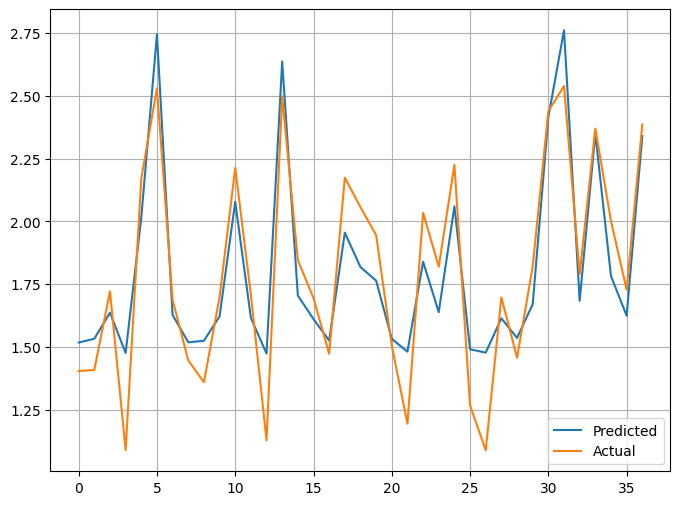

In [63]:
plt.figure(figsize=(8,6))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.grid()
plt.show()

### **Cross Validation**

In [64]:
# Hyper Parameter Tuning

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
model_3 = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
model_3.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [65]:
print("The best fit alpha value is found out to be :" ,model_3.best_params_)
print("\nUsing ",model_3.best_params_, " the negative mean squared error is: ", model_3.best_score_)


The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [66]:
# Model Predication
y_pred_ridge  = model_3.predict(x_test)

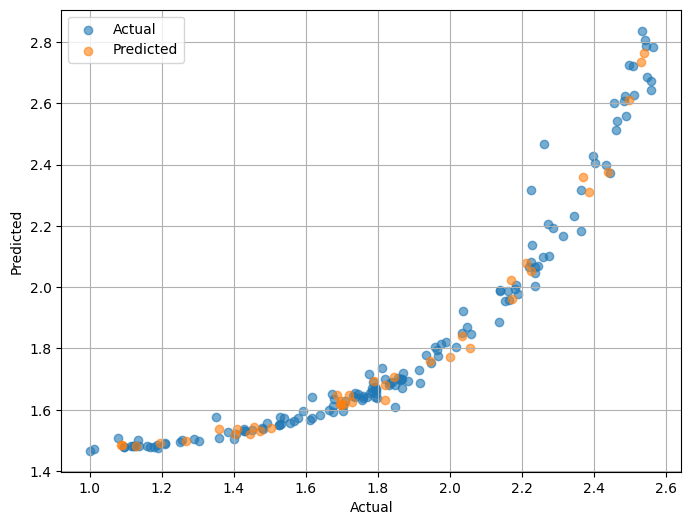

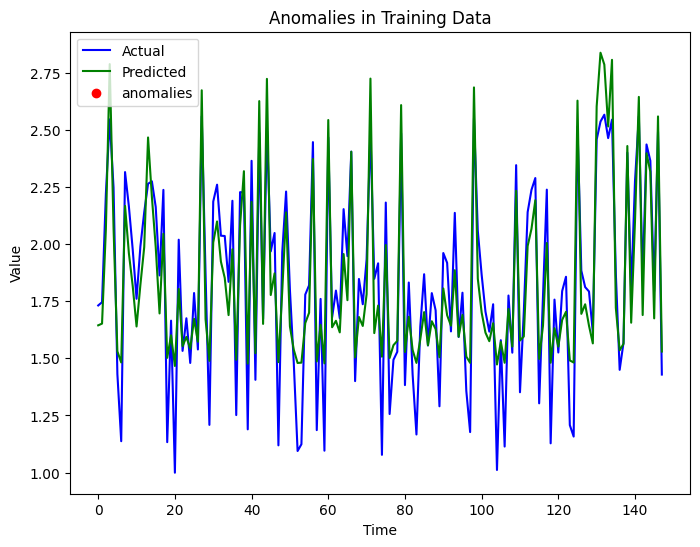

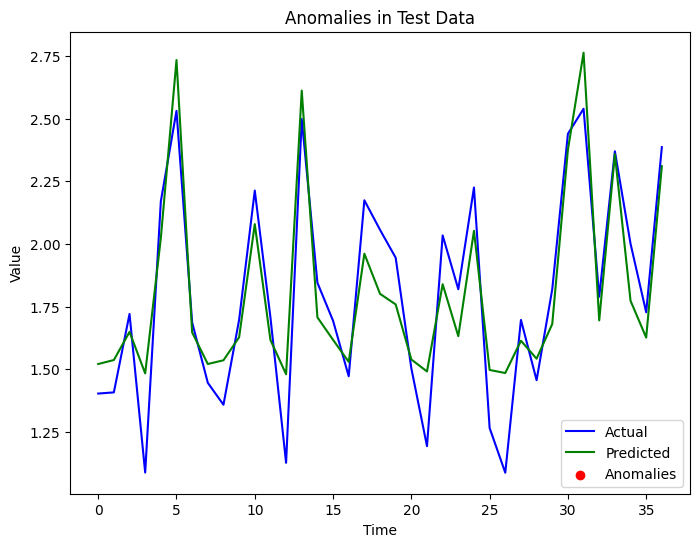

In [67]:
plot_model(model_3,x_train,y_train,x_test,y_test,plot_anomalies=True)

Evaluation Metrics

In [68]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


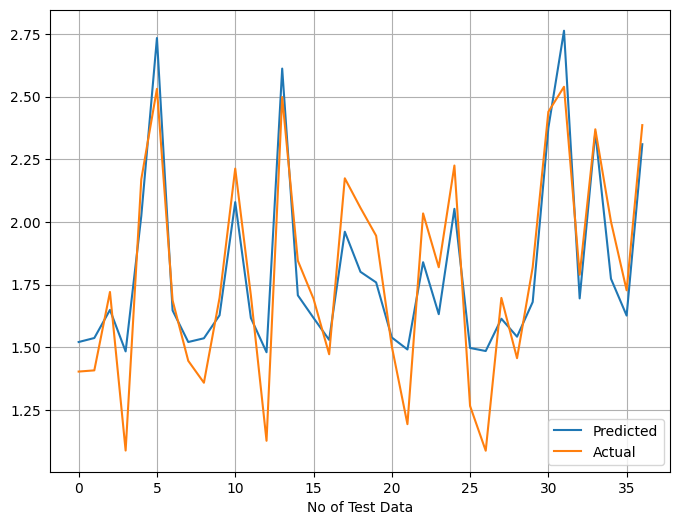

In [69]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

# RandomForest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [72]:
# Splitting our datas into dependant and independant variable
X = data.drop(columns=['Close','Date'])
Y = data['Close']

In [73]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [74]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,Y_train)
y_pred_rf = rf_regressor.predict(X_test)

Evaluation Metrics

In [75]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_test,y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test,y_pred_rf))
print("R-squared (R2) score:", r2_score(Y_test,y_pred_rf))

Mean Squared Error (MSE): 191.49313071891905
Root Mean Squared Error (RMSE): 13.838104303658035
Mean Absolute Error (MAE): 8.768205405405391
R-squared (R2) score: 0.9788143972841578


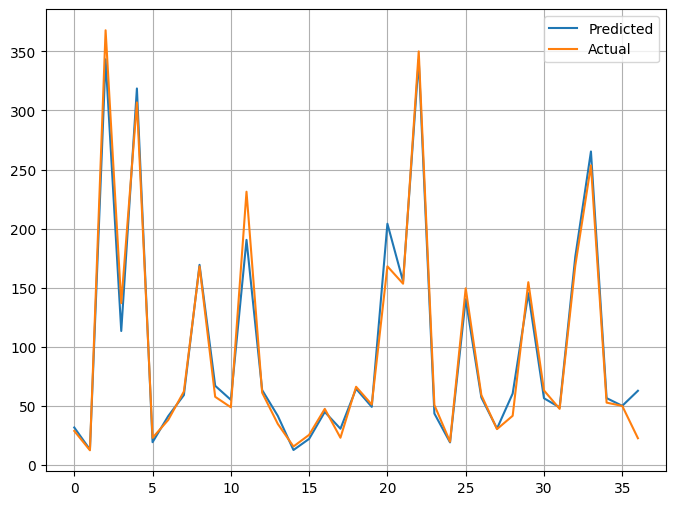

In [76]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_rf)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

###Hyperparameter Tuning

In [77]:
param_grid = {'n_estimators':[50,100,150],
              'max_depth':[5,10,15],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4],
              'bootstrap':[True,False]}

rf_cv = RandomForestRegressor()
model_4 = GridSearchCV(estimator=rf_cv,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')


In [78]:
model_4.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

Evaluation Metrics

In [79]:
print('Best Parameter value is ',model_4.best_params_)
print('Using best alpha value ',model_4.best_params_,' the negative mean squared error is ', model_4.best_score_ )

Best Parameter value is  {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Using best alpha value  {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}  the negative mean squared error is  -124.53261396400008


In [80]:
y_pred_rf_cv = model_4.predict(X_test)

Evaluation Metrics

In [81]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_test,y_pred_rf_cv))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_test,y_pred_rf_cv)))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test,y_pred_rf_cv))
print("R-squared (R2) score:", r2_score(Y_test,y_pred_rf_cv))

Mean Squared Error (MSE): 206.272247548009
Root Mean Squared Error (RMSE): 14.36218115566048
Mean Absolute Error (MAE): 9.527169667382173
R-squared (R2) score: 0.977179328201227


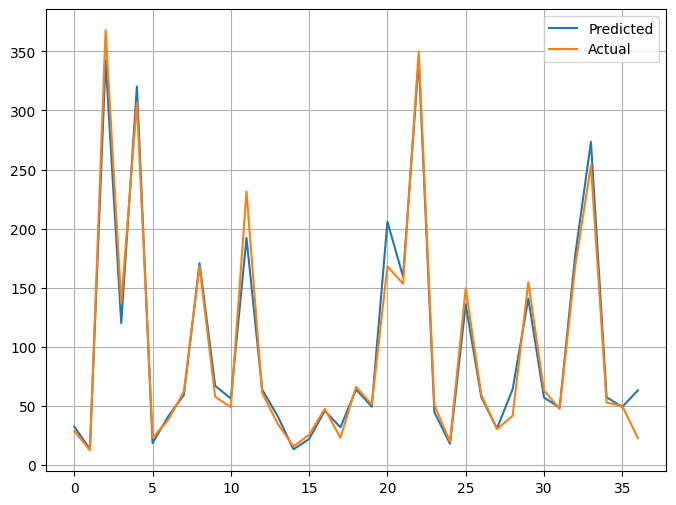

In [82]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_rf_cv)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

#XGBoost Model

In [83]:
from xgboost import XGBRegressor

In [84]:
xgb = XGBRegressor()

xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
y_pred_xgb = xgb.predict(X_test)

Evaluation Metrics

In [86]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_test,y_pred_xgb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_test,y_pred_xgb)))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test,y_pred_xgb))
print("R-squared (R2) score:", r2_score(Y_test,y_pred_xgb))

Mean Squared Error (MSE): 264.139134689774
Root Mean Squared Error (RMSE): 16.25235781939882
Mean Absolute Error (MAE): 9.6059995785275
R-squared (R2) score: 0.9707772976073077


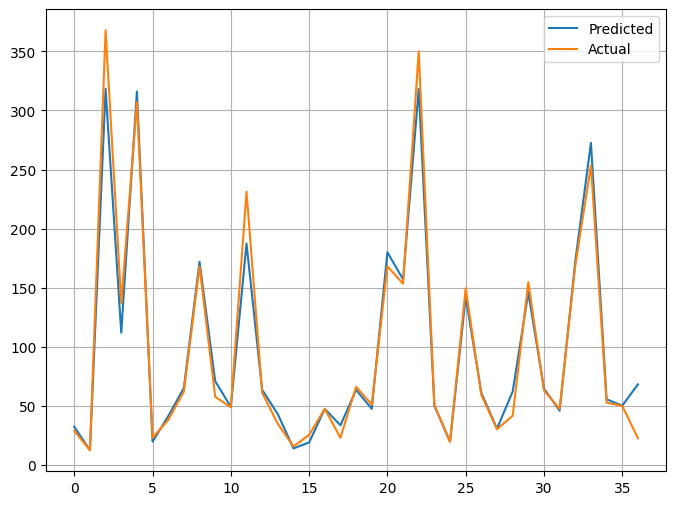

In [87]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_xgb)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

##**Cross Validation**

In [88]:
xgb_cv = XGBRegressor()

In [89]:
param_grid = {
    'n_estimators': [ 50,100,150,200,250],
    'learning_rate' : [0.01,0.02, 0.1,0.2 ,0.3],
    'max_depth':[15,20,25],
    'gamma':[0,0.1,0.2],
    'subsample': [0.7, 0.8, 0.9]
}


In [90]:
model_5 = GridSearchCV(estimator = xgb_cv , param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

In [91]:
model_5.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.3],
                         'max_depth': [15, 20, 25],
                         'n_estimators': [50, 100, 150, 200, 250],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [92]:
print('Best Parameter value is ',model_5.best_params_)
print('Using best alpha value ',model_5.best_params_,' the negative mean squared error is ', model_5.best_score_ )

Best Parameter value is  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 250, 'subsample': 0.8}
Using best alpha value  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 250, 'subsample': 0.8}  the negative mean squared error is  -146.30175785869844


In [93]:
y_pred_xgb_cv = model_5.predict(X_test)

In [94]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_test,y_pred_xgb_cv))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_test,y_pred_xgb_cv)))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test,y_pred_xgb_cv))
print("R-squared (R2) score:", r2_score(Y_test,y_pred_xgb_cv))

Mean Squared Error (MSE): 211.83680746286268
Root Mean Squared Error (RMSE): 14.554614644945522
Mean Absolute Error (MAE): 8.982989947344805
R-squared (R2) score: 0.9765637000833828


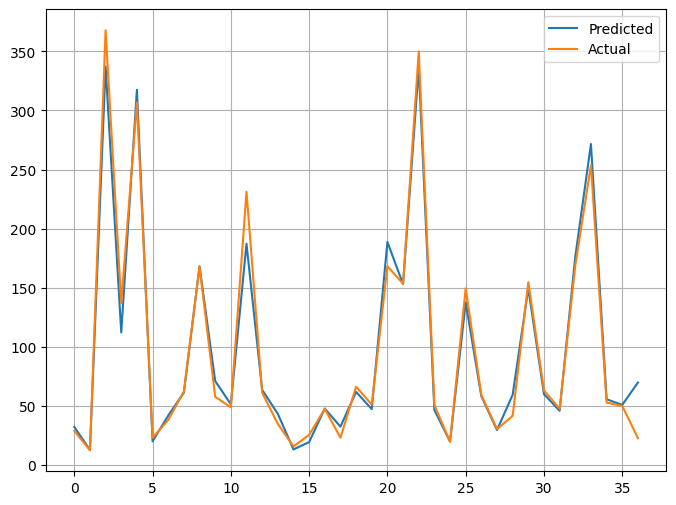

In [95]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_xgb_cv)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

## Plot All Model Performance

In [96]:
# Summary
for i in (reg,lasso,model_2,ridge,model_3,rf_regressor,model_4,xgb,model_5):
  pred = i.predict(X_test)
  print('\n RMSE for ',i,' is ',np.sqrt(mean_squared_error(pred,Y_test)))

  print('\n R2 Score for ',i,' is ',r2_score(pred,Y_test))

  print(100*'-')


 RMSE for  LinearRegression()  is  83.25461775962174

 R2 Score for  LinearRegression()  is  -4.217283463271434
----------------------------------------------------------------------------------------------------

 RMSE for  Lasso(alpha=0.005, max_iter=3000)  is  84.22376086780591

 R2 Score for  Lasso(alpha=0.005, max_iter=3000)  is  -4.524680388675408
----------------------------------------------------------------------------------------------------

 RMSE for  GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')  is  84.86767581998933

 R2 Score for  GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
    

From Above model Summary we can conclude that best RMSE and R2_score are -
- Random Forest RMSE=14.10 and R2_Score=0.97
- Random Forrest with cross validation RMSE=14.4 and R2_score=0.97
- XGBregressor with Cross validation RMSE=14.5 and R2_score =0.97  

#Conclusion

- We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.
- We checked for logarthmic transformation of features, as they were right skewed.
- A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.
- Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.
- Regression models namely random forest regressor, xgboost regressor were built.